### Import Library

In [101]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

### Import Dataset

In [56]:
data = pd.read_csv("C:\\Users\\dhiwa\\OneDrive\\Dokumen\\datanyawch\\heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Check Data Info
untuk mengetahui jenis data dan mengecek apakah terdapat missing value atau tidak

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Mengambil 2 variabel untuk dikonversi (Age dan Cholesterol)

In [72]:
X = data.iloc[:, [0,4]].values

### Membuat Elbow Method

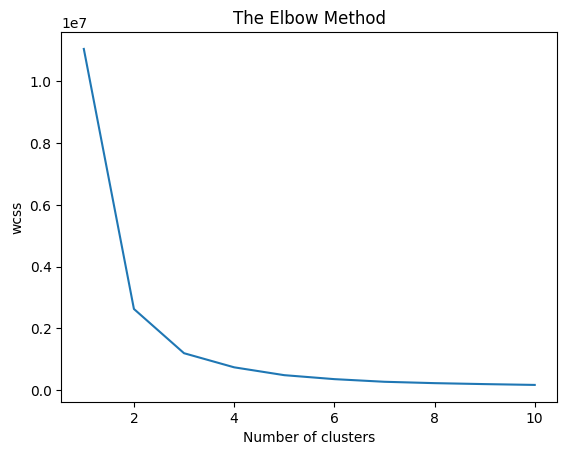

In [98]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#### Interpretasi : Dilihat dari Elbow Method tersebut bahwa K=3

### Membuat Model Dengan Menggunakan 3 Cluster
3 Cluster berdasarkan hasil k pada elbow method

In [91]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

### Visualisasi Scatter Plot 3 Cluster

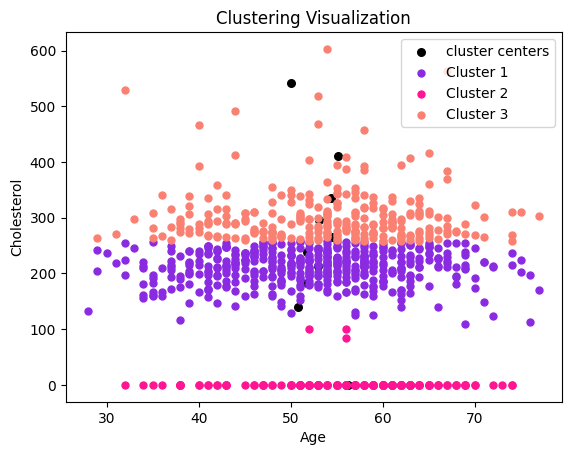

In [96]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'cluster centers')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'blueviolet', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'deeppink', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 25, c = 'salmon', label = 'Cluster 3')

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

#### Interpretasi : 
Cluster 1 : menunjukkan umur diatas 25 tahun yang memiliki tingkat kolesterol normal dan tinggi, tetapi didominasi dengan tingkat kolesterol yang normal.

Cluster 2 : menunjukkan umur diatas 30 tahun yang memiliki tingkat kolesterol rendah diangka 0 - 100.

Cluster 3 : menunjukkan umur diatas 30 tahun yang memiliki tingkat kolesterol yang tinggi mencapai lebih dari 250.

# Membuat Dendogram

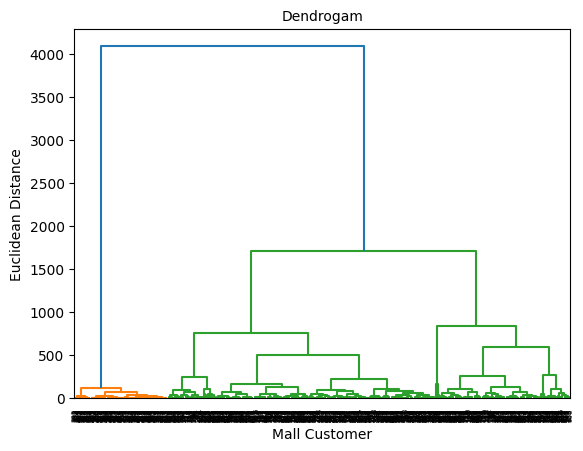

In [105]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 10)
plt.xlabel('Mall Customer')
plt.ylabel('Euclidean Distance')
plt.show()